### Modelling the Profit


Our unitary profit is given by the selling price of our product minus the costs. Therefore the total profit equals the unitary profit times the units produced/sold. 

$$ P = (Selling Price - Cost)* units $$

The cost, though, has two main factors; resources and wages.

$$ P = (Selling Price - [Input Resources + Wages])* units $$

The input resources are actually straightforward, but the wages are not… 
First of all, we have the base worker wages cost. but, we have an admin overhead for each building level we have built, therefore our Wages should look something like this: 

$$ Wages = WorkerWages*(1+AdminOverhead) $$

Though, AdminOverhead increments 1/170 for each building level; 

$$ Wages = WorkerWages*(1+\frac{BuildingLevels}{170}) $$

And then our COO executive/hero came to the game! reducing 1% the Admin overhead for each effective skill level $Sk = \frac{COO + \frac{CMO + CFO + CTO}{4}}{100}$

$$ Wages = WorkerWages*\big{(}1+\frac{BuildingLevels}{170}(1-Sk) \big{)} $$

And… then we have the opportunity to increase the production speed of our processes!! Either by installing recreational buildings or by improving in level and choosing the Productivity bonus option. Consider that the Productivity bonus (let’s call it ‘Pb’) means two things; first of them, it will cost less to produce each unit $(1-Pb)*WorkerWages$. Second, you will produce more units daily $\frac{units}{1-Pb}$, therefore earning more. Our functions should be expressed as: 

$$ P = (Selling Price - [Input Resources + Wages])* \frac{units}{1-Pb} $$

$$ Wages = WorkerWages*\big{(}1+\frac{BuildingLevels}{170}(1-Sk) \big{)} (1-Pb) $$

For an easier read. let’s call the selling price as ‘Sp’,  the input resources as ‘In’, the building levels as ‘BL’, and the worker wages as ‘Pw’.  

$$ P = (Sp - [In + Wages])* \frac{units}{1-Pb} $$

$$ Wages = Pw*\big{(}1+\frac{BL}{170}(1-Sk) \big{)} (1-Pb) $$

Since P depends on the Wages we can substitute it and find that: 

$$ P = \big{[} Sp - In - Pw*\big{(}1+\frac{BL}{170}(1-Sk) \big{)} (1-Pb) \big{]} \frac{units}{1-Pb} $$


Our only incognita right now is the ‘units’ variable. The hourly production is equal to the produced units ‘Pu’ multiplied by the amount of buildings ‘BL’. If we want to calculate the daily profit, then just multiply this by 24.

$$ P = \big{[} Sp - In - Pw*\big{(}1+\frac{BL}{170}(1-Sk) \big{)} (1-Pb) \big{]} \frac{BL * Pu}{1-Pb} $$

We are almost finished! 
One more thing… What if we have some robots???
Then the wages would go down by 3%. That means that our profit is determined by the equation: 

$$ P = \big{[} Sp - In - 0.97*Pw*\big{(}1+\frac{BL}{170}(1-Sk) \big{)} (1-Pb) \big{]} \frac{BL * Pu}{1-Pb} $$

Then we can merge both functions and make the robots a binary option: 

$$ P = \big{[} Sp - In - Pw*(1-0.03*Ro)*\big{(}1+\frac{BL}{170}(1-Sk) \big{)} (1-Pb) \big{]} \frac{BL * Pu}{1-Pb} $$

Where $Ro$ is the binary option of the robots or the absence of them (if $Ro = 1$ True, else False) 

## Optimal building level

Through this notebook we will look for the optimal building level according to our assumptions.

It may be required to get some information as: 

- Cumulative building levels $B_L$ : Sum of levels of each building in the game
- Selling price $Sp$ : price at which the product you're about to produce will be sold at 
- Total Inputs price $In$ : sum of the units*prices required to produce the product
- Product wages $Fw$ : The cost of running the Product per hour, per level (No admin overhead assumed yet). It used to be given by the game, today we have to calculate it by ourselves as $Fw = Pw * Pu$ (each of the variables are described next)
- Produced units $Pu$ : Amount of units produced in one hour in a lvl1 building. 
- Product wages $Pw$ : The building worker wages paid for each produced unitl (not including admin overhead) - this value can be found in the encyclopedia entry for each product as the ‘Unit Worker Cost’ calculation, so we express the previous formula $Fw = Pw * Pu$ in our code, requiring the variable $Pw$
- Productivity bonus $Pb$ : '%' of extra production (it could have been gotten by stars, parks and recreation buildings, or robots) 
- Executives skill bonus $Sk$ : Cumulative skill of the executives $Sk = \frac{COO + \frac{CMO + CFO + CTO}{4}}{100}$
- Robots: As a binary information. True if we have installed robots in all our buildings.

The expected profit $P$ is given by the function: 

$$ P = \big{[} Sp - In - Pw*\big{(}1+\frac{BL}{170}(1-Sk) \big{)} (1-Pb) \big{]} \frac{BL * Pu}{1-Pb} $$
Note:

The daily profit could be gotten by multiplying the profit times 24

Therefore; The daily Profit with no robots stands as:

$$ P = \big{[} Sp - In - Pw*\big{(}1+\frac{BL}{170}(1-Sk) \big{)} (1-Pb) \big{]} \frac{BL * Pu * 24}{1-Pb} $$

and with robots: 

$$ P = \big{[} Sp - In - 0.97Pw*\big{(}1+\frac{BL}{170}(1-Sk) \big{)} (1-Pb) \big{]} \frac{BL * Pu * 24}{1-Pb} $$


###### some info hidden-
<!-- The 'optimal' building level is given when:

$$ \frac{\partial P}{\partial Bl} = 0$$

$$ \frac{\partial P}{\partial Bl} = \big{[} Sp - In - \big{(}\frac{2 Bl (1-Sk)}{170}+1 \big{)} \frac{Pw}{(1 + Pb)} \big{]} = 0 $$

Solving for $Bl$: 

$$ Bl^* = \big{(} (Sp - In) \frac{(1+Pb)}{Pw} - 1 \big{)} \frac{170}{2 (1-Sk)} $$ -->-

### Building costs

Additional to the Optimal profit, there is another variable; the cost of upgrading at a certain building level.

The costs for upgrading a building ($Cb$) are given the following way:
  
if $C$ is the cost of upgrading a lvl 1 building, then every upgrade can be expressed as:

- Lvl 1: C
- Lvl 2: C
- Lvl 3: 2C
- Lvl 4: 3C
- Lvl 5: 4C
- ... 

Then the building cost of 1 slot until level "$Lvl$" could be expressed as $1+\frac{1+(Lvl-1)}{2}(Lvl-1))$

Since we pretend to build the total amount of buildings evenly (more efficient), then the total Building Costs $Tc$ can be aproximated as a function of the total building levels $Bl$ (as defined previously), the building slots $Sl$, and the unitary costs of upgrading $C$ (since this formula requires discrete numbers it is only exact when the ratio between $Bl$ and $Sl$ is an integer, otherwise it is just an approximation):

$Tc = \big{[}1+\frac{1+(\frac{Bl}{Sl}-1)}{2}(\frac{Bl}{Sl}-1)) \big{]} C * Sl $


### Numerical approximations

For this exercise we are assuming the production of rocket engines. and therefore comparing between the use of robots or the absense of them. 

- $Pu = 0.29$
- $Pw = 2050$
- $Sp = 10900$
- $In = 9950 - 2650 = 7300$
- $Pb = 0.04$ or $0.07$ with robots
- $Sk = 0.30$
- $Bl = ?$ 
- $Robots = 0$ # 1 or 0; True or False

So we are playing with the building level as the main variable 

In [35]:
reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [101]:
# %matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

# from mpl_interactions import ipyplot as iplt

def P(Bl, Sp, In, Pu, Pb, Pw, Sk, Robots):
    # Profit
    R = 1-0.03*Robots
    W = (Bl*(1-Sk)/170 +1)*Pw*(1-Pb)*R
    P = (Sp - In - W) * Bl/(1-Pb)
    return  P * 24 * Pu# To find daily profit

def An_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots):
    # Analytical estimation for the building level
    return ((Sp - In)*(1+Pb)/Pw -1)*170/2/(1-Sk) #By now, this method is not working

def Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots):
    # Numerical estimation for the building level 
    def neg_p(*args):
        return -P(*args)
    return opt.minimize(neg_p,x0=80,args=(Sp, In, Pu, Pb, Pw, Sk, Robots)).x[0] # Numerical Optimization

def P_star(Sp, In, Pu, Pb, Pw, Sk, Robots):
    # Optimal Profit
    # P(Bl(Sp, In, Pu, Pb, Fw, Sk),Sp, In, Pu, Pb, Fw, Sk) equivalent:
#     return (P(Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots), Sp, In, Pu, Pb, Pw, Sk, Robots))
    return (P(Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots), Sp, In, Pu, Pb, Pw, Sk, Robots))


def BuildingCost(Bl, Sl, C):
    #Building costs
    sing = lambda x: 1+((1+(x-1))/2*(x-1)) #For one simple building at lvl; x
    return sing(Bl/Sl)*C*Sl #For many buildings at lvl; Bl/Sl

def OptimalBuildingCosts(Bl_star, *args):
    return BuildingCost(Bl_star, *args)

In [102]:
# Optimal solution with no robots: 

Sp = 1.75
In = 1.14
Pw = 0.51
Pu = 204.86
Pb = 0.04 # No robots
Sk = 0.31
Robots = 0

slots = 13
UnitaryBuildingCost = 105000

print("Optimal Building Level: {}".format(Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots)))
print("Profit at optimal building level: {}".format(P_star(Sp, In, Pu, Pb, Pw, Sk, Robots)))
print("Building costs of optimal building level: {}".format(OptimalBuildingCosts(Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots), slots, UnitaryBuildingCost)))

Optimal Building Level: 30.29388687242571
Profit at optimal building level: 9340.036664653438
Building costs of optimal building level: 3480746.1735487785


In [106]:
P(26, Sp, In, Pu, Pb, Pw, Sk, Robots)

9152.39091520002

In [99]:
# Numerical estimation of the Building level
Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots)

30.29388687242571

In [96]:
# Analytical estimation of the Building level
# An_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots) Not working yet

In [84]:
# Same scenario, but with robots

Robots = 1 # Robots

print("Optimal Building Level: {}".format(Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots)))
print("Profit at optimal building level: {}".format(P_star(Sp, In, Pu, Pb, Pw, Sk, Robots)))
print("Building costs of optimal building level: {}".format(OptimalBuildingCosts(Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots), slots, UnitaryBuildingCost)))

Optimal Building Level: 35.040754671261034
Profit at optimal building level: 12121.52933424641
Building costs of optimal building level: 4484003.504097554


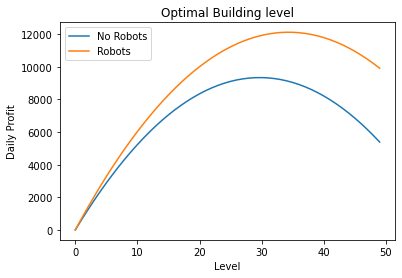

In [85]:
Bls =np.linspace(0,50,50)
fig, ax = plt.subplots()
# controls = iplt.plot(Bls, P , Sp=Sp, In=In, Pu=Pu, Pb=(0,0.1), Fw=Fw, Sk=(0,0.6))
plt.plot(P(Bls, Sp, In, Pu, 0.04, Pw, Sk, 0), label = 'No Robots')
plt.plot(P(Bls, Sp, In, Pu, 0.04, Pw, Sk, 1), label = 'Robots')
plt.title('Optimal Building level')
plt.xlabel('Level')
plt.ylabel('Daily Profit')
plt.legend()
plt.show();

### Multi-Step process

For the multi-step scenario the same formulas are used with a slight modification. This modification though, requires a lot of attention for the manual entry of the data.

The process starts in a similar way as the previous case scenario. This time, for simplicity, we are representing the Profit as 3 different parts: 

- Selling price $Sp$ (at which we are selling our product)
- Total Input Resources $In_{T}$ (As the not produced resources for any of the resources produced in the full process)
- Total Wages $W_{T}$ (As the total amount paid in wages in the full process) 

Next we have the Building level $Bl$, but this time we will need to add an additional multiplier parameter $$ in representation of the building units required to produced a single unit of the final product.

So the profit may be defined as:

$$ P = [Sp - In_T - W_T] Bl$$

Where the Total Wages are defined as: 

$$W_T = \sum_{i=1}^{n} R_i W_i =  \big{(} \frac{ Bl (1-Sk)}{170}+1 \big{)} \frac{1}{(1+Pb)} \sum_{i=1}^{n} R_i Pw_i $$

where $R_i$ is the requiered amount of each resource for the end product.(if it's the end product, $R_i = 1$)

Lets say $\sum_{i=1}^{n} R_i Pw_i$ is equivalent to the 'Total product wages', and let it be equal to $Pw_T$

Then we can express $W_T$ as: 

$$W_T = \big{(} \frac{ Bl (1-Sk)}{170}+1 \big{)} \frac{Pw_T }{(1+Pb)} $$

Evaluating the Total wages expression into our profit

$$ P = [Sp - In_T - \big{(} \frac{ Bl (1-Sk)}{170}+1 \big{)} \frac{Pw_T }{(1+Pb)}] Bl$$

$$ P = \big{[} Bl Sp - Bl In - Bl \big{(}\frac{ Bl (1-Sk)}{170}+1 \big{)} \frac{Pw}{(1 + Pb)} \big{]} $$

$$ P = \big{[} Bl Sp - Bl In - \big{(}\frac{ Bl^2 (1-Sk)}{170}+ Bl \big{)} \frac{Pw}{(1 + Pb)} \big{]} $$

Note: In order to get the daily profit we must multiply the Profit by $24 * Pu * \alpha(X)$ where $Pu$ is the amount of units produced of our finished product and the alpha of the end product $X$. (For this calculations, we will define a variable $\alpha$)

$$ P_d = [Sp - In_T - \big{(} \frac{ Bl (1-Sk)}{170}+1 \big{)} \frac{Pw_T }{(1+Pb)}] Bl * Pu * 24 * \alpha$$


The 'optimal' building level is given when:

$$ \frac{\partial P}{\partial Bl} = 0$$

$$ \frac{\partial P}{\partial Bl} = \big{[} Sp - In - \big{(}\frac{2  Bl (1-Sk)}{170}+1 \big{)} \frac{Pw}{(1 + Pb)} \big{]} = 0 $$

Solving for $Bl$: 

$$ Bl^* = \big{(} (Sp - In) \frac{(1+Pb)}{Pw} - 1 \big{)} \frac{170}{2  (1-Sk)} $$

This model is the same as the single step solution plus some extra letters. It just adds some intermediate manual steps for the calculation of $In_T$, $Pw_T$, and $\alpha$ as the proportion of building per resource required.

### Numerical approximations
Lets consider we are building BFRs 

The input resources for each of the steps are: 
- BFR: 1 Orbital Booster + 1 Starship
- Orbital Booster: 40 fuselage + 16 propellant tanks + 34 Rocket engines
- Starship: 2 Cockpit + 10 Heat shield + 4 Attitude controller + 6 propellant tanks + 7 Rocket engines
- Rocket engines: 20 Steel + 8 HGEC + 10 Aluminium

But, since we are producing some dependencies, we may not consider them into our Total inputs variable.  
our total input resources is then stated as:

$In_T =$ 1 Orbital Booster + 1 Starship

$In_T =$ 1*(40 fuselage + 16 propellant tanks + 34 Rocket engines) + 1*(2 Cockpit + 10 Heat shield + 4 Attitude controller + 6 propellant tanks + 7 Rocket engines)

$In_T =$ 1*(40 fuselage + 16 propellant tanks + 34 * (20 Steel + 8 HGEC + 10 Aluminium)) + 1*(2 Cockpit + 10 Heat shield + 4 Attitude controller + 6 propellant tanks + 7 * (20 Steel + 8 HGEC + 10 Aluminium))

$In_T \approx 1*(40*2750 + 16* 9350 + 34*(20*10.7 + 8* 880 + 10*18.8)) + 1*(2*5100 + 10*515 + 4*4780 + 6*9350 + 7*(20*10.7 + 8* 880 + 10*18.8)) \approx 512628 + 142664 \approx 655292 $

In the same way, our Wages can be defined as the sum of the wages of the individual wages

$W_T = W_{HGEC} + W_{RE} = \big{(} \frac{ Bl (1-Sk)}{170}-1 \big{)} \frac{1}{(1+Pb)} \big{(} BFR*Pw_{BFR} +OB*Pw_{OB} + Star*Pw_{Star} + RE*Pw_{RE} \big{)}$

So the total Product Wages $Pw_T$ is equal to:

$Pw_T = \sum_{i=1}^{n} Pw_i = BFR*Pw_{BFR} +OB*Pw_{OB} + Star*Pw_{Star} + RE*Pw_{RE} $ 

$Pw_T = 1*3600 + 1*390 + 1*1950 + (34+7)*2220 = 96960$

And we have all the information but the building ratio $\alpha$
For the calculation of this ratio we need to know the amount of buildings required for the production fo a single unit of the end product (RE) 

### $\alpha $ estimation

The procedure for the estimation of alpha is to calculate the amount of buildings required to produce one unit of the end product in one hour. 

We need to produce:
$$ BFR = 1 OB_{BFR} + 1 Star_{BFR} + 34 RE_{OB_{BFR}} + 7 RE_{Star_{BFR}} $$

Therefore, our alpha can be calculated as: 
$$ \alpha_T = \frac{1}{Pu_{BFR}} + \frac{OB}{Pu_{OB}}  + \frac{Star}{Pu_{Star}} + \frac{OB * RE}{Pu_{RE}}  + \frac{Star * RE}{Pu_{RE}}$$ 

$$ \alpha_T = \frac{1}{Pu_{BFR}} + \frac{1}{Pu_{OB}}  + \frac{1}{Pu_{Star}} + \frac{34}{Pu_{RE}}  + \frac{7}{Pu_{RE}}$$ 

$$ \alpha_T \approx 155.19$$

$$ \alpha_{BFR} = \frac{1}{Pu_{BFR}} * \frac{1}{\alpha_T} \approx \frac{4.76}{155.19} \approx 0.0307$$
$$ \alpha_{OB} = \frac{OB}{Pu_{OB}} * \frac{1}{\alpha_T} \approx \frac{0.6666}{155.19} \approx 0.0043$$
$$ \alpha_{Star} = \frac{Star}{Pu_{Star}} * \frac{1}{\alpha_T} \approx \frac{3.333}{155.19} \approx 0.0215$$
$$ \alpha_{RE} = \big{(} \frac{OB * RE}{Pu_{RE}}  + \frac{Star * RE}{Pu_{RE}} \big{)}* \frac{1}{\alpha_T} \approx \frac{121.42}{155.19} + \frac{25}{155.19}\approx 0.7824 + 0.1611 \approx 0.9435$$

So, most of our efforts should be to produce Rocket engines at the cheapest price possible. 

Consider that between each step there's a gap in profit, where we buy low quality input resources and we transform them into high quality output resources which are sold more expensive (Let's say we buy q2 $HGEC$, produce q3 $RE$, produce q4 $OB$ and $Star$, and lastly produce q5 $BFR$.

The process isn't cheap though. It requires a lot of money in investigation for the high quality products. 

In [86]:
# Multi-step Building optimization 

Sp = 800000 # Of the final product
In = 627989
Pw = 96960 
Pu = 0.0307 * 0.21 # alpha of the end product * Pu of the end product

Pb = 0.04 # No robots
Sk = 0.3

slots = 13
UnitaryBuildingCost = 105000

print("Optimal Building Level: {}".format(Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots)))
print("Profit at optimal building level: {}".format(P_star(Sp, In, Pu, Pb, Pw, Sk, Robots)))
print("Building costs of optimal building level: {}".format(OptimalBuildingCosts(Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots), slots, UnitaryBuildingCost)))

Optimal Building Level: 109.90641065263378
Profit at optimal building level: 723817.955985856
Building costs of optimal building level: 44377182.893323824


In [87]:
Pb = 0.07 # Robots
print("Optimal Building Level: {}".format(Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots)))
print("Profit at optimal building level: {}".format(P_star(Sp, In, Pu, Pb, Pw, Sk, Robots)))
print("Building costs of optimal building level: {}".format(OptimalBuildingCosts(Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots), slots, UnitaryBuildingCost)))

Optimal Building Level: 117.36896477904746
Profit at optimal building level: 825446.2868666362
Building costs of optimal building level: 50834850.84129442


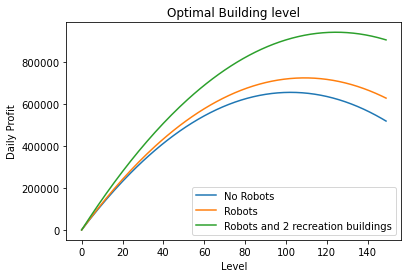

In [88]:
Bls =np.linspace(0,150,150)
fig, ax = plt.subplots()
# controls = iplt.plot(Bls, P , Sp=Sp, In=In, Pu=Pu, Pb=(0,0.1), Fw=Fw, Sk=(0,0.6))
plt.plot(P(Bls, Sp, In, Pu, 0.04, Pw, Sk, 0), label = 'No Robots')
plt.plot(P(Bls, Sp, In, Pu, 0.04, Pw, Sk, 1), label = 'Robots')
plt.plot(P(Bls, Sp, In, Pu, 0.1, Pw, Sk, 1), label = 'Robots and 2 recreation buildings')
plt.title('Optimal Building level')
plt.xlabel('Level')
plt.ylabel('Daily Profit')
plt.legend()
plt.show();

##### Just another simulation

In [89]:
# Multi-step Building optimization 

Sp = 820000 # Of the final product
In = 627989
Pw = 96960 

Pu = 0.0307 * 0.21 # alpha of the end product * Pu of the end product

Pb = 0.04 # No robots
Sk = 0.3

slots = 13
UnitaryBuildingCost = 105000

print("Optimal Building Level: {}".format(Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots)))
print("Profit at optimal building level: {}".format(P_star(Sp, In, Pu, Pb, Pw, Sk, Robots)))
print("Building costs of optimal building level: {}".format(OptimalBuildingCosts(Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots), slots, UnitaryBuildingCost)))

Optimal Building Level: 136.804249505466
Profit at optimal building level: 1121454.0347195938
Building costs of optimal building level: 69764210.81208414


In [90]:
Pb = 0.07 # Robots
print("Optimal Building Level: {}".format(Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots)))
print("Profit at optimal building level: {}".format(P_star(Sp, In, Pu, Pb, Pw, Sk, Robots)))
print("Building costs of optimal building level: {}".format(OptimalBuildingCosts(Num_Bl(Sp, In, Pu, Pb, Pw, Sk, Robots), slots, UnitaryBuildingCost)))

Optimal Building Level: 145.13412753847746
Profit at optimal building level: 1262184.0023923109
Building costs of optimal building level: 78811268.78566372


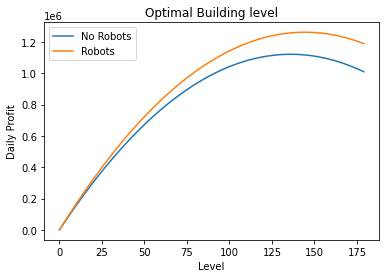

In [92]:
Bls =np.linspace(0,180,180)
fig, ax = plt.subplots()
# controls = iplt.plot(Bls, P , Sp=Sp, In=In, Pu=Pu, Pb=(0,0.1), Fw=Fw, Sk=(0,0.6))
plt.plot(P(Bls, Sp, In, Pu, 0.04, Pw, Sk, Robots), label = 'No Robots')
plt.plot(P(Bls, Sp, In, Pu, 0.07, Pw, Sk, Robots), label = 'Robots')
plt.title('Optimal Building level')
plt.xlabel('Level')
plt.ylabel('Daily Profit')
plt.legend()
plt.show();

Comparing the two previous graphs. One when selling at 800k (assuming q4) and one when selling at 820k (assuming q5),  there's a big shift of the curve. so this product is too sensitive to the selling price and the use of robots. 

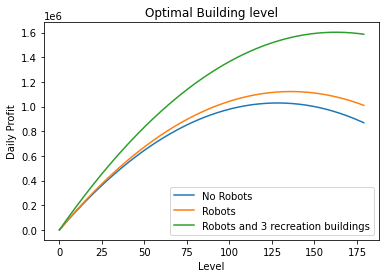

In [95]:
Bls =np.linspace(0,180,180)
fig, ax = plt.subplots()
# controls = iplt.plot(Bls, P , Sp=Sp, In=In, Pu=Pu, Pb=(0,0.1), Fw=Fw, Sk=(0,0.6))
plt.plot(P(Bls, Sp, In, Pu, 0.04, Pw, Sk, 0), label = 'No Robots')
plt.plot(P(Bls, Sp, In, Pu, 0.04, Pw, Sk, 1), label = 'Robots')
plt.plot(P(Bls, Sp, In, Pu, 0.13, Pw, Sk, 1), label = 'Robots and 3 recreation buildings')
plt.title('Optimal Building level')
plt.xlabel('Level')
plt.ylabel('Daily Profit')
plt.legend()
plt.show();